<a href="https://colab.research.google.com/github/AlvaroBecker/Proyecto-2/blob/parte2/parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Al usar el conjunto de datos aprobado que propusieron para el proyecto 2, parte 1 la semana pasada, limpiarán y explorarán el conjunto de datos.  

Para cumplir con los requisitos para esta semana, deben haber:

-eliminado las columnas innecesarias

-eliminado las filas duplicadas

-identificado y abordado los valores faltantes 

-identificado y corregido las inconsistencias en los datos para los valores categóricos (es decir, Cat, cat, cats)

-producido visuales univariantes para el objetivo y todas las características

-identificado los valores atípicos

-producido un mapa de calor de correlación e identificado cualquier correlaciones moderadas o fuertes entre el objetivo y las características y/o entre una característica y otra

-comentado todos los pasos de limpieza y descrito todas las decisiones que tomaron. (Nota: durante la pila final del programa, harán una presentación para una audiencia técnica que incluirá sus decisiones y procesos en los pasos de limpieza. Entre más notas tomen ahora, más fácil será la presentación. Para clarificar, esa presentación NO se entrega ahora).

Deberían comenzar a trabajar en su EDA* en profundidad y a hacer visuales multivariantes para la próxima parte 3 de esta tarea una vez que hayan presentado todas las tareas y el examen de cinturón para esta pila.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_atlas=pd.read_csv('/content/drive/MyDrive/Coding_dojo/Proyecto2/atlas-higgs-challenge-2014-v2.csv')

https://opendata.cern.ch/record/328 Dataset from the ATLAS Higgs Boson Machine Learning Challenge 2014

| Variable                      | Description                                                                                                      |
|-------------------------------|------------------------------------------------------------------------------------------------------------------|
| EventId                       | An unique integer identifier of the event.                                                                       |
| DER_mass_MMC                  | The estimated mass mH of the Higgs boson candidate, obtained through a probabilistic phase space integration.    |
| DER_mass_transverse_met_lep   | The transverse mass between the missing transverse energy and the lepton.                                       |
| DER_mass_vis                  | The invariant mass of the hadronic tau and the lepton.                                                          |
| DER_pt_h                      | The modulus of the vector sum of the transverse momentum of the hadronic tau, the lepton and the missing transverse energy vector.|
| DER_deltaeta_jet_jet          | The absolute value of the pseudorapidity separation between the two jets (undefined if PRI_jet_num ≤ 1).       |
| DER_mass_jet_jet              | The invariant mass of the two jets (undefined if PRI_jet_num ≤ 1).                                              |
| DER_prodeta_jet_jet           | The product of the pseudorapidities of the two jets (undefined if PRI_jet_num ≤ 1).                             |
| DER_deltar_tau_lep            | The R separation between the hadronic tau and the lepton.                                                       |
| DER_pt_tot                    | The modulus of the vector sum of the missing transverse momenta and the transverse momenta of the hadronic tau, the lepton, the leading jet (if PRI_jet_num ≥ 1) and the subleading jet (if PRI jet num = 2) (but not of any additional jets).|
| DER_sum_pt                    | The sum of the moduli of the transverse momenta of the hadronic tau, the lepton, the leading jet (if PRI jet num ≥ 1) and the subleading jet (if PRI jet num = 2) and the other jets (if PRI jet num = 3).|
| DER_pt_ratio_lep_tau          | The ratio of the transverse momenta of the lepton and the hadronic tau.                                         |
| DER_met_phi_centrality        | The centrality of the azimuthal angle of the missing transverse energy vector w.r.t. the hadronic tau and the lepton.|
| DER_lep_eta_centrality        | The centrality of the pseudorapidity of the lepton w.r.t. the two jets (undefined if PRI_jet_num ≤ 1).         |
| PRI_tau_pt                    | The transverse momentum p2x+p2y−−−−−−√ of the hadronic tau.                                                     |
| PRI_tau_eta                   | The pseudorapidity η of the hadronic tau.                                                                       |
| PRI_tau_phi                   | The azimuth angle ϕ of the hadronic tau.                                                                        |
| PRI_lep_pt                    | The transverse momentum p2x+p2y−−−−−−√ of the lepton (electron or muon).                                       |
| PRI_lep_eta                   | The pseudorapidity η of the lepton.                                                                             |
| PRI_lep_phi                   | The azimuth angle ϕ of the lepton.                                                                              |
| PRI_met                        | The missing transverse energy $\overrightarrow{E}^{miss}_{T}$                                                    |
| PRI_met_phi                   | The azimuth angle ϕ of the missing transverse energy                                                             |
| PRI_met_sumet                 | The total transverse energy in the detector.                                                                    |
| PRI_jet_num                   | The number of jets (integer with value of 0, 1, 2 or 3; possible larger values have been capped at 3). |
| PRI_jet_leading_pt | The transverse momentum p2x+p2y−−−−−−√ of the leading jet, that is the jet with largest transverse momentum (undefined if PRI_jet_num = 0). |
| PRI_jet_leading_eta | The pseudorapidity η of the leading jet (undefined if PRI_jet_num = 0). |
| PRI_jet_leading_phi | The azimuth angle ϕ of the leading jet (undefined if PRI_jet_num = 0). |
| PRI_jet_subleading_pt | The transverse momentum p2x+p2y−−−−−−√ of the leading jet, that is, the jet with second largest transverse momentum (undefined if PRI_jet_num ≤ 1). |
| PRI_jet_subleading_eta | The pseudorapidity η of the subleading jet (undefined if PRI_jet_num ≤ 1). |
| PRI_jet_subleading_phi | The azimuth angle ϕ of the subleading jet (undefined if PRI_jet_num ≤ 1). |
| PRI_jet_all_pt | The scalar sum of the transverse momentum of all the jets of the events. |
| Weight | The event weight wi |
| Label | The event label (string) yi ∈ {s,b} (s for signal, b for background). (objetivo) |
| KaggleSet | String specifying to which Kaggle set the event belongs : ”t”:training, ”b”:public leaderboard, ”v”:private leaderboard,”u”:unused. |
| KaggleWeight | Weight normalised within each Kaggle dataset. |


Con este dataset, se quiere predecir si un evento es una señal que corresponde a la producción de un bosón de Higgs (s) o si es un evento de fondo (b). El bosón de Higgs es una partícula elemental en el Modelo Estándar de la física de partículas y fue descubierto en 2012 en el CERN.

En este caso, el objetivo es construir un modelo de aprendizaje automático que pueda distinguir entre eventos de señal y eventos de fondo utilizando las características proporcionadas en el dataset. La variable objetivo es la columna "Label", que contiene dos posibles valores: 's' para la señal y 'b' para el fondo.

Eliminado columnas innecesarias

In [4]:
df_atlas=df_atlas.drop(columns='EventId')

Al ser un campo tipo ID cuyos valores son todos unicos, no nos aportaran ningun beneficio a la hora de crear los modelos, por lo que se decide eliminar esta columna del dataset (EventID).

In [5]:
df_atlas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818238 entries, 0 to 818237
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   DER_mass_MMC                 818238 non-null  float64
 1   DER_mass_transverse_met_lep  818238 non-null  float64
 2   DER_mass_vis                 818238 non-null  float64
 3   DER_pt_h                     818238 non-null  float64
 4   DER_deltaeta_jet_jet         818238 non-null  float64
 5   DER_mass_jet_jet             818238 non-null  float64
 6   DER_prodeta_jet_jet          818238 non-null  float64
 7   DER_deltar_tau_lep           818238 non-null  float64
 8   DER_pt_tot                   818238 non-null  float64
 9   DER_sum_pt                   818238 non-null  float64
 10  DER_pt_ratio_lep_tau         818238 non-null  float64
 11  DER_met_phi_centrality       818238 non-null  float64
 12  DER_lep_eta_centrality       818238 non-null  float64
 13 

-Eliminado las filas duplicadas

In [6]:
df_atlas.duplicated().sum()

0

-identificado y abordado los valores faltantes: No hay valores faltantes en este conjunto de datos. Debido a la naturaleza del dataset no se puede asumir que los valores 0 o 0.00 sean datos nulos.

In [7]:
df_atlas.isnull().sum()

DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_all_pt                 0
Weight    

-Identificado y corregido las inconsistencias en los datos para los valores categóricos (es decir, Cat, cat, cats)

In [8]:
df_atlas['Label'].unique()

array(['s', 'b'], dtype=object)

In [9]:
df_atlas['KaggleSet'].unique()

array(['t', 'b', 'v', 'u'], dtype=object)

-Producido visuales univariantes para el objetivo y todas las características

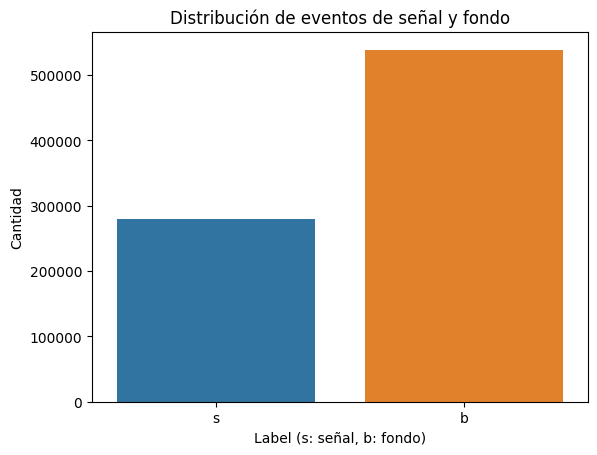

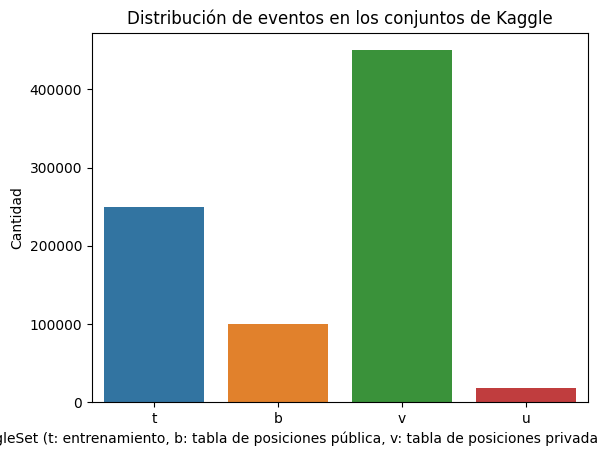

In [10]:
# Gráfico de barras para la característica 'Label'
sns.countplot(x='Label', data=df_atlas)
plt.title("Distribución de eventos de señal y fondo")
plt.xlabel("Label (s: señal, b: fondo)")
plt.ylabel("Cantidad")
plt.show()

# Gráfico de barras para la característica 'KaggleSet'
sns.countplot(x='KaggleSet', data=df_atlas)
plt.title("Distribución de eventos en los conjuntos de Kaggle")
plt.xlabel("KaggleSet (t: entrenamiento, b: tabla de posiciones pública, v: tabla de posiciones privada, u: no utilizado)")
plt.ylabel("Cantidad")
plt.show()


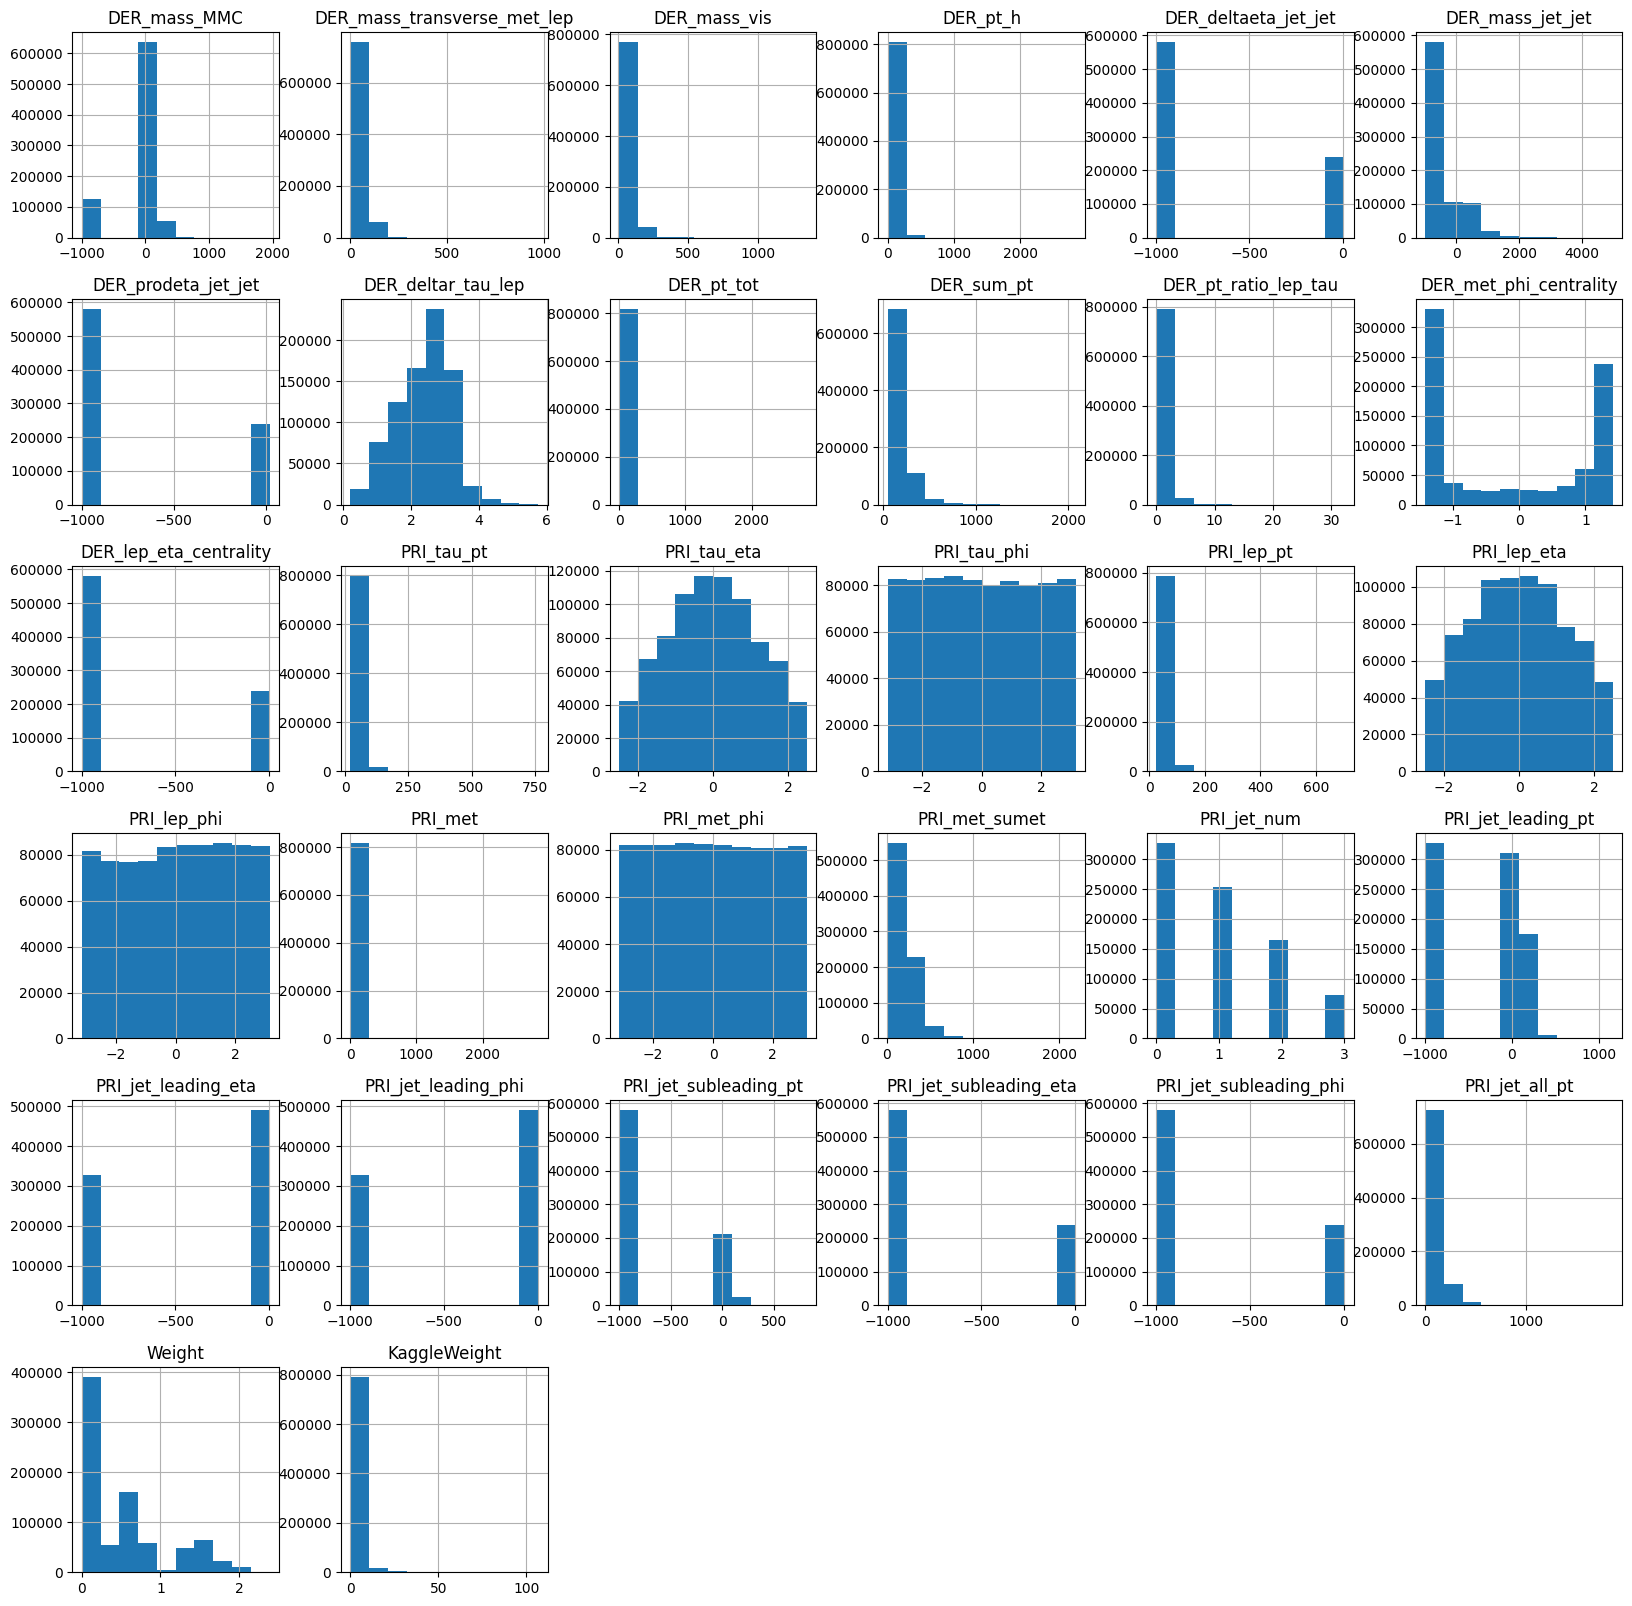

In [11]:
df_atlas.hist(figsize=(20, 20))
plt.show()


-Identificado los valores atípicos

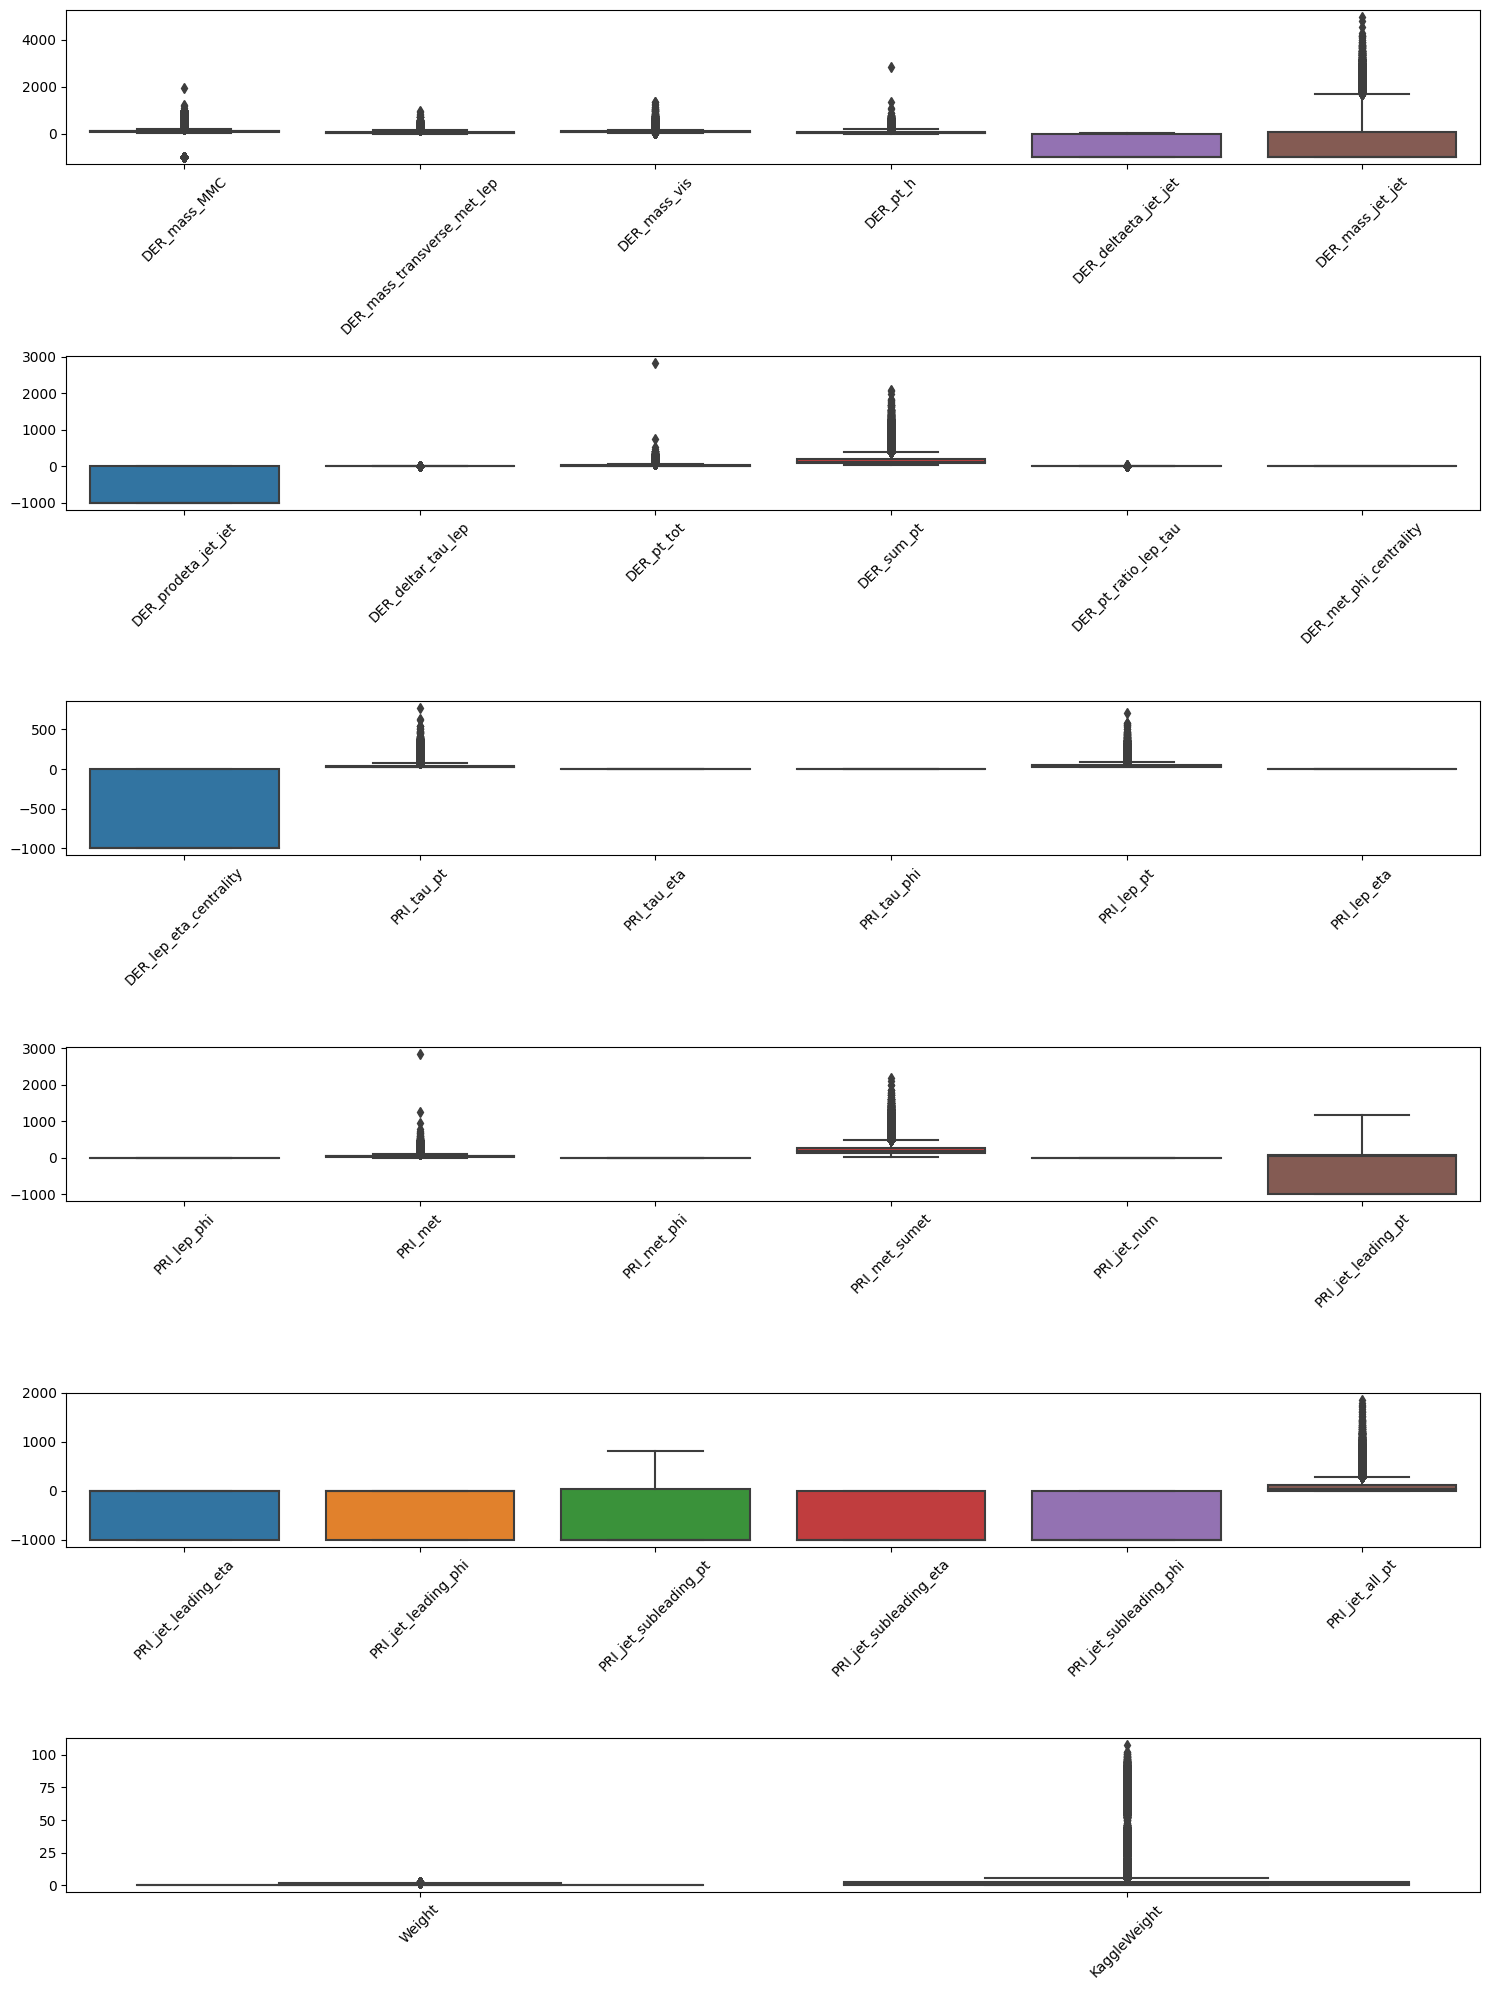

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

all_features =df_atlas.columns

num_features_per_plot = 6
num_plots = (len(all_features) + num_features_per_plot - 1) // num_features_per_plot

fig, axes = plt.subplots(num_plots, 1, figsize=(15, 20))

for i, ax in enumerate(axes):
    start_idx = i * num_features_per_plot
    end_idx = start_idx + num_features_per_plot
    sns.boxplot(data=df_atlas[all_features[start_idx:end_idx]], ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


In [13]:
# Utilizar el rango intercuartil (IQR) para identificar y eliminar valores atípicos
Q1 = df_atlas.quantile(0.25)
Q3 = df_atlas.quantile(0.75)
IQR = Q3 - Q1
# Filtrar valores atípicos
df_filtered = df_atlas[~((df_atlas < (Q1 - 1.5 * IQR)) | (df_atlas > (Q3 + 1.5 * IQR))).any(axis=1)]


<ipython-input-13-af7ee39889b7>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df_atlas.quantile(0.25)
<ipython-input-13-af7ee39889b7>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df_atlas.quantile(0.75)
<ipython-input-13-af7ee39889b7>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_filtered = df_atlas[~((df_atlas < (Q1 - 1.5 * IQR)) | (df_atlas > (Q3 + 1.5 * IQR))).any(axis=1)]


In [14]:
df_filtered

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,KaggleSet,KaggleWeight
0,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,197.760,...,2.150,0.444,46.062,1.240,-2.475,113.497,0.000814,s,t,0.002653
1,160.937,68.768,103.235,48.146,-999.000,-999.000,-999.000,3.473,2.078,125.157,...,0.725,1.158,-999.000,-999.000,-999.000,46.226,0.681042,b,t,2.233584
3,143.905,81.417,80.943,0.414,-999.000,-999.000,-999.000,3.310,0.414,75.968,...,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,1.660654,b,t,5.446378
5,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,278.876,...,-2.412,-0.653,56.165,0.224,3.106,193.660,0.025434,b,t,0.083414
8,105.594,50.559,100.989,4.288,-999.000,-999.000,-999.000,2.904,4.288,65.333,...,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,1.614803,b,t,5.296003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818226,140.804,24.712,98.037,29.817,-999.000,-999.000,-999.000,2.907,21.578,131.994,...,-0.153,-0.147,-999.000,-999.000,-999.000,38.654,0.005721,s,u,0.259892
818229,161.338,82.848,101.681,76.665,2.882,273.808,-0.343,3.075,18.813,230.771,...,2.758,1.131,37.876,-0.124,-1.672,136.986,0.000461,s,u,0.020956
818231,110.083,24.084,68.991,105.747,-999.000,-999.000,-999.000,1.840,9.618,198.989,...,-0.348,-2.836,-999.000,-999.000,-999.000,110.841,0.019533,b,u,0.875080
818233,105.668,46.443,60.048,156.191,0.403,47.746,0.936,1.279,6.133,256.853,...,1.190,-0.766,41.791,0.787,-1.090,154.056,0.005721,s,u,0.259892


-Producido un mapa de calor de correlación e identificado cualquier correlaciones moderadas o fuertes entre el objetivo y las características y/o entre una característica y otra

<ipython-input-15-7122da4906b3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_atlas.corr()


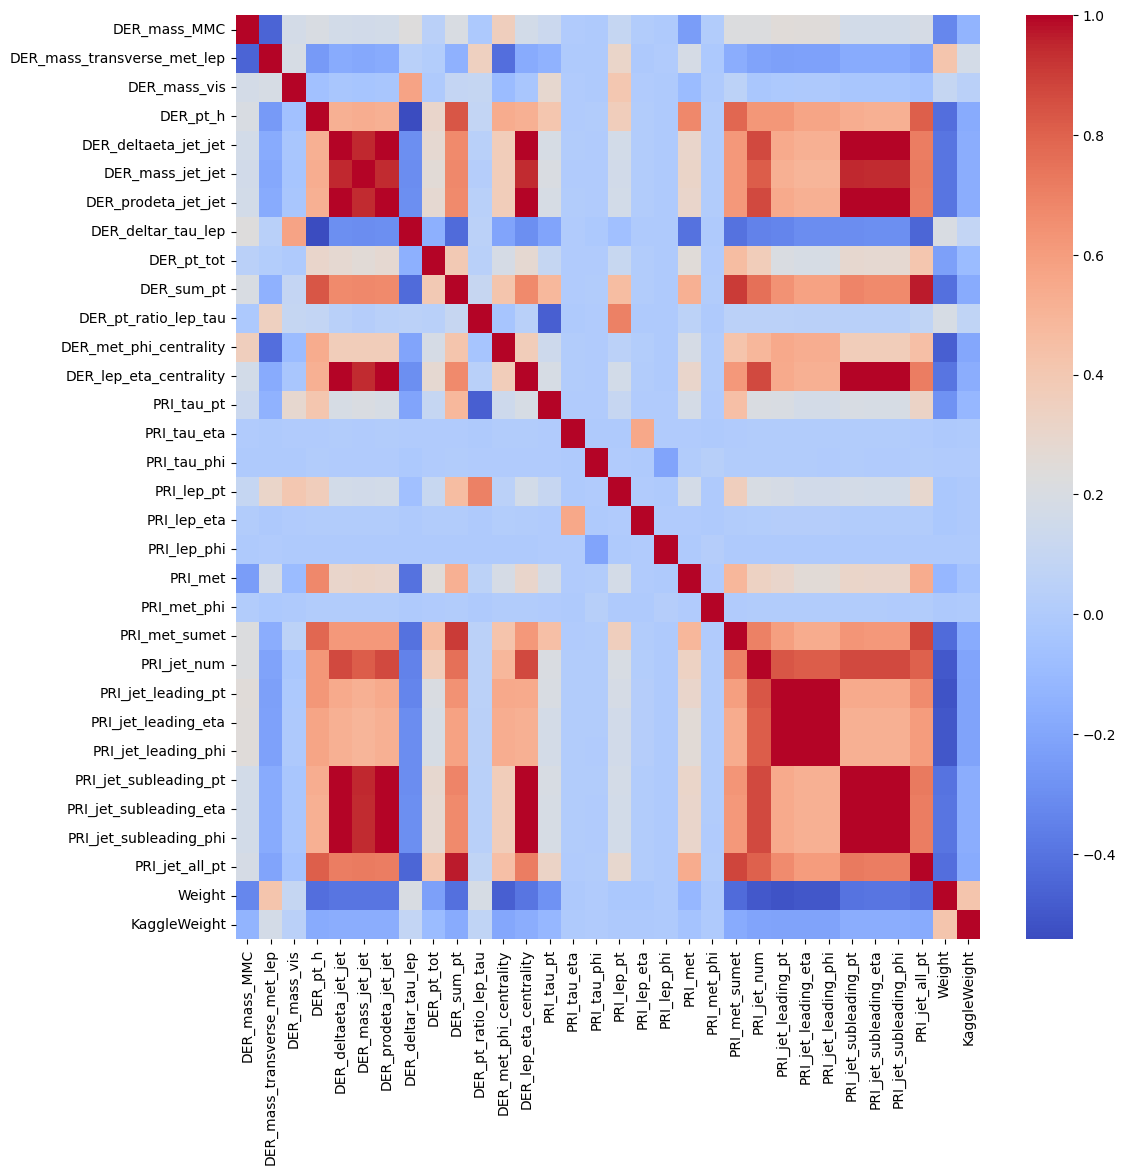

In [15]:
# Calcular la matriz de correlación
corr_matrix = df_atlas.corr()

# Visualizar la matriz de correlación usando un mapa de calor
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")
plt.show()
